# Detector Gain

This is a Jupyter notebook, which allows us to write and run Python code in a realtime, interactive fashion. There are two main kinds of cells

* Markdown cells like this one. We can make notes and write equations in  LaTeX (e.g, $e = mc^2$)

* Code cells like the one below. Type Shift-Enter to run a code cell.

In [1]:
# This is a comment.
print(1 + 1)

## Importing packages
We first need to import the packages we'll use to load, analyze, and visualize the data.

In [2]:
# Astropy is 
from astropy.io import fits

# Numpy is a powerful package for numerical analysis.
import numpy as np

# Matplotlib is the most popular Python plotting package.
import matplotlib.pyplot as plt

## Working with FITS files in Python
At their most basic, FITS files are just arrays of integers corresponding to the counts in each pixel. Usually FITS files also contain metadata in a header, such as the exposure time, or transformations from pixel coordinates to sky coordinates (RA and Dec.). The astropy fits package allows us to load FITS files as Numpy arrays, which we can then perform calculations on.

Note the call to `astype(np.int32)` at the end of `fits.getdata`. This is very important for getting the correct result for computer science reasons you can ignore if you want to. If you're interested in why this matters, see the end of the notebook.

#### Replace 'data/Flat.15S0X1.V.14.fits' with one of your images.

In [3]:
image = fits.getdata('PartOne/slitview.00000352.BIAS.FIT').astype(np.int32)
print(image.shape)
print('')
print(image)

(495, 657)

[[ 93 165 167 ... 119 112 105]
 [132 128 133 ...  28  61  51]
 [138 117  98 ... 140  97  87]
 ...
 [161  79 136 ...  74  90  78]
 [160 146  85 ... 119  41  25]
 [190 102 164 ...  80  86  77]]


We can see that the image is just a 1472 x 2184 array of integers.

## Load Images
Using the `fits.getdata` function, Load the two flat images and two bias images that you will use to calculate the gain. Remembers to put `.astype(np.int32)` at the end

In [4]:
flat1 = fits.getdata('PartOne/slitview.00000357.FLAT.FIT').astype(np.int32)
flat2 = fits.getdata('PartOne/slitview.00000358.FLAT.FIT').astype(np.int32)
bias1 = fits.getdata('PartOne/slitview.00000352.BIAS.FIT').astype(np.int32)
bias2 = fits.getdata('PartOne/slitview.00000353.BIAS.FIT').astype(np.int32)

You can write Equation 3 in code much like it appears in the instructions. You can make variables that are the same as the variables in the equation.

* For the mean: `mean_f1 = np.mean(flat1)`
* For the squared standard deviation of the image difference ($\sigma^2$): `sigma_f1f2 = np.std(flat_1 - flat_2)`

In the cell below, write out the equation. Use parentheses to ensure the correct order of operations.

In [5]:
mean_f1 = np.mean(flat1)
print(mean_f1)

mean_f2 = np.mean(flat2)
print(mean_f2)

mean_b1 = np.mean(bias1)
print(mean_b1)

mean_b2 = np.mean(bias2)
print(mean_b2)

sigma_f1f2 = np.std(flat1 - flat2)
print(sigma_f1f2)

sigma_b1b2 = np.std(bias1 - bias2)
print(sigma_f1f2)

gain = ((mean_f1 + mean_f2) - (mean_b1 + mean_b2))/(sigma_f1f2**2 - sigma_b1b2**2)
print(gain)

17697.9642574912
17692.17737496733
117.06587949510325
107.69197915225313
284.59985477272613
284.59985477272613
0.44927752953155137


### Read noise
Calculate the read noise. The square root function is `np.sqrt()`

In [6]:
read_noise = (gain * sigma_b1b2) / np.sqrt(2)

print(read_noise)

16.58715609296461


## Working with Subregions
Is your gain value close to the manufacturer's specification (1.3 e-/ADU)? What happens when you calculate the gain for a subregion of the detector? In the example below, we select a 100 x 100 pixel sub region from `row0` to `row1` and `colm0` to `colm1`.

In [7]:
row0 = 100
row1 = 200
colm0 = 200
colm1 = 300

# This is called taking a 'slice' of the array, i.e. a subregion
sub_image = image[row0:row1, colm0:colm1]

print(sub_image.shape)
print('')
print(sub_image)

(100, 100)

[[118  93 101 ... 122 106 139]
 [131 149  41 ...  67  66 121]
 [119 179 223 ...  61 113  99]
 ...
 [129 116 145 ... 140  93 168]
 [109 153 114 ...  98  97 118]
 [ 95  58 115 ... 206 162  82]]


Now try calculating the gain in different subregions by varying `row0`, `row1`, `colm0`, and `colm1` Try different sizes, e.g. 100 x 100, 200 x 200, etc

In [8]:
row0 = 200
row1 = 300
colm0 = 300
colm1 = 400

flat1_sub = flat1[row0:row1, colm0:colm1]
flat2_sub = flat2[row0:row1, colm0:colm1]
bias1_sub = bias1[row0:row1, colm0:colm1]
bias2_sub = bias2[row0:row1, colm0:colm1]

sub_mean_f1 = np.mean(flat1_sub)
print(sub_mean_f1)

sub_mean_f2 = np.mean(flat2_sub)
print(sub_mean_f2)

sub_mean_b1 = np.mean(bias1_sub)
print(sub_mean_b1)

sub_mean_b2 = np.mean(bias2_sub)
print(sub_mean_b2)

sub_sigma_f1f2 = np.std(flat1_sub - flat2_sub)
print(sub_sigma_f1f2)

sub_sigma_b1b2 =np.std(bias1_sub - bias2_sub)
print(sub_sigma_b1b2)

sub_gain = ((sub_mean_f1 + sub_mean_f2) - (sub_mean_b1 + sub_mean_b2))/(sub_sigma_f1f2**2 - sub_sigma_b1b2**2)
print(sub_gain)

sub_read_noise = (sub_gain * sub_sigma_b1b2) / np.sqrt(2)
print(sub_read_noise)

25295.2335
25276.5989
115.3643
107.0679
339.337753989797
52.13084832457649
0.4478189713669586
16.507537117678904


## Adding Bells and Whistles

Below is a little more advanced Python programming. You can try running it on your own data and tweaking the code to see how it works. 

You probably found varying and typing everything out by hand to be a bit tedious. Alternatively, we can write a function to calculate the gain. The text in triple quotations is called the doc(umentation)string. It tells the user what the function does, what the arguments are, and what the function returns.

In [9]:
def calculate_gain(flat_1, flat_2, bias_1, bias_2):
    """
    Calculate detector gain given two flat frames and two bias frames.
    
    Parameters
    ----------
    flat_1, flat_2 : numpy.array_like
        The flat frames
    bias_1, bias_2 : numpy.array_like
        The bias frames
        
    Returns
    -------
    gain : float
        The detector gain
    """
    # This is Equation 3 from the assignment
    numerator = (np.mean(flat_1) + np.mean(flat_2)) - (np.mean(bias_1) + np.mean(bias_2))
    denominator = np.std((flat_1 - flat_2)) ** 2 - np.std((bias_1 - bias_2)) ** 2
    gain = numerator / denominator
    
    return gain

##### Replace these files with your own data to try out the code.

In [10]:
flat_1 = fits.getdata('PartOne/slitview.00000357.FLAT.FIT').astype(np.int32)
flat_2 = fits.getdata('PartOne/slitview.00000358.FLAT.FIT').astype(np.int32)
bias_1 = fits.getdata('PartOne/slitview.00000352.BIAS.FIT').astype(np.int32)
bias_2 = fits.getdata('PartOne/slitview.00000353.BIAS.FIT').astype(np.int32)

## Calculating the gain in different subregions
We can divide the detector up into a grid of subregions. The `bins` are the row and column boundaries of the subregions. Effectively we are making a coarse "map" of the gain calculated on different parts of the detector.

In [11]:
row_bins = np.linspace(0, flat_1.shape[0], 5).astype(int)
print(row_bins)
col_bins = np.linspace(0, flat_1.shape[1], 10).astype(int)
print(col_bins)

[  0 123 247 371 495]
[  0  73 146 219 292 365 438 511 584 657]


In [12]:
# This is an array to store the gain in each subregion.
gain_map = np.zeros((len(row_bins) - 1, len(col_bins - 1)))

# This nested for loop goes through each subregion.
for ii in range(len(row_bins) - 1):
    for jj in range(len(col_bins) - 1):
        row_slice = slice(row_bins[ii], row_bins[ii + 1])
        col_slice = slice(col_bins[jj], col_bins[jj + 1])
        
        # The `local_gain` is the gain in the subregion
        local_gain = calculate_gain(flat_1[row_slice, col_slice], flat_2[row_slice, col_slice],
                                    bias_1[row_slice, col_slice], bias_2[row_slice, col_slice])
        
        # Store the local gain in the `gain_map`
        gain_map[ii, jj] = local_gain

## Plot the gain values

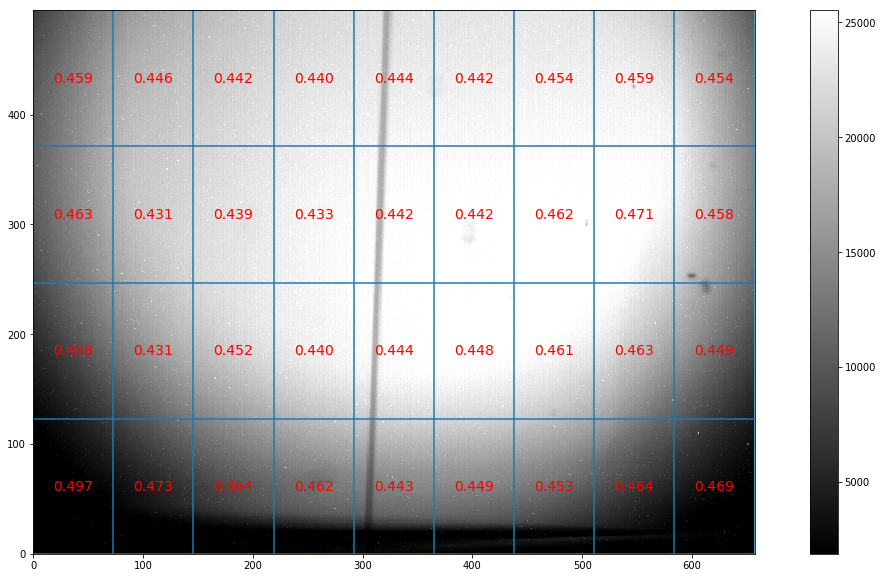

In [13]:
plt.figure(figsize=(20, 10))

# Use the imshow function to plot one of the flat images for reference.
plt.imshow(flat_1, vmin=np.percentile(flat_1, 5), vmax=np.percentile(flat_1, 90),
           origin='lower', cmap='binary_r', interpolation='nearest')


# Plot the boundaries of the subregions
for row in row_bins:
    plt.axhline(row)
for col in col_bins:
    plt.axvline(col)

# Print the local gain value in each subregion
for ii in range(len(row_bins) - 1):
    for jj in range(len(col_bins) - 1):
        row_loc = (row_bins[ii] + row_bins[ii + 1]) / 2
        col_loc = (col_bins[jj] + col_bins[jj + 1]) / 2
        
        plt.text(col_loc, row_loc, '{:.3f}'.format(gain_map[ii, jj]),
                 ha='center', va='center', fontsize=14, color='r')

plt.xlim(0, col_bins[-1])
plt.ylim(0, row_bins[-1])

# Add a colorbar
plt.colorbar()
plt.show()

## Unsigned versus signed integers

As their names suggest, unsigned integers can only represent non-negative numbers. That's 0 up to $2^n - 1$, where $n$ is the number of bits the variable takes up in memory. Signed integers can have values from $-(2^{n-1})$ up to $2^{n - 1} - 1$.

Negative values have no real physical meaning on an astronomical image, so the negative values are a waste of memory. Therefore images are usually stored as unsigned integers.

The problem is when we need to subtract two sets of unsigned integers, like we did in the gain calculation. This can give weird results if we're not careful.

In [14]:
a = np.array([1], dtype=np.uint16)
b = np.array([3], dtype=np.uint16)

print('a =', a)
print('b =', b)
print('a - b =', a - b)

a = [1]
b = [3]
a - b = [65534]


We can fix this by converting the unsigned 16-bit integers to signed 32-bit integers.

In [15]:
a = a.astype(np.int32)
b = b.astype(np.int32)

print('a =', a)
print('b =', b)
print('a - b =', a - b)

a = [1]
b = [3]
a - b = [-2]
